In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Step 1 Exploratory data Analysis for Titanic dataset.

In [3]:
train=pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#HeatMap generate cheseki we need a matrix and thus we are making it using isnull method and passing it to
#heatmap funtion. 

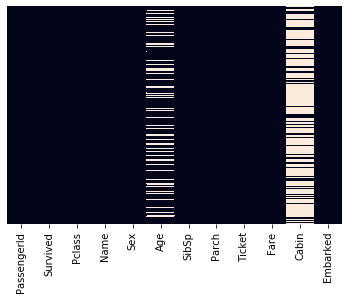

In [6]:
#Analysis : Shows there are lot of null values in Cabin column and Age. But mostly in Cabin. So we can exclude that 
#Column during data Analysis.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [7]:
#Count plot ni categorical columns paina apply cheseki use chestam. Ante categories unna column ki categories X axis paina
#and vaati counts Y axis paina plot avuthay adhe countplot valla advantage.
#Hue argument yenti :
# 1.Survived column ki countPlot vesthe, dead vs survived plot vasthundhi.
# 2.Sex column ki count plot vesthe, male vs Female countPlot vasthundhi.
# 3.Manaku Male - Dead,Survived and Female - Dead,Survived renditi combination raadhu. So aa case lo manam 'hue' ane 
# property use chestham. Appudu rendinti combination vasthundhi as well as labels vastayi.

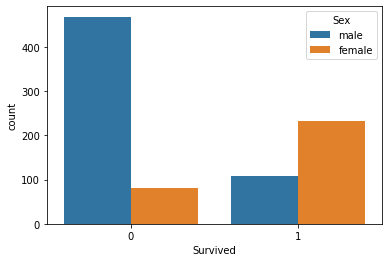

In [8]:
sns.countplot(x="Survived",hue='Sex',data=train)

In [9]:
 #Analysis :This shows people who are dead mostly belong to class 3 #Cheapest price.

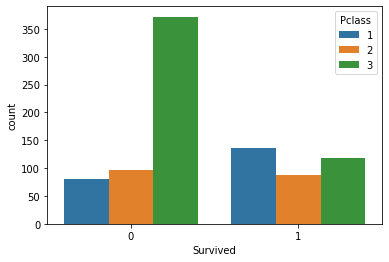

In [10]:
sns.countplot(x="Survived",hue='Pclass',data=train)

In [11]:
#countPlot is better for cAtegorical data and Distplot is better for Univariant data. 
#Eg : Distplot for 0-100 aged people's counts.
#Eg : CountPlot for Male and Female categories seperate counts.

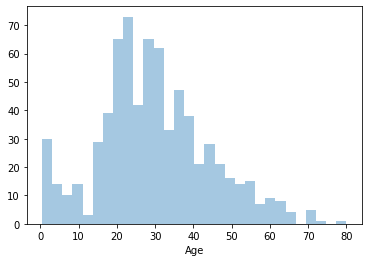

In [12]:
# Analysis : This shows that most people travelled (Not dead,because we used distplot and not countPlot) in Titanic were
# in the agegroup of 20-40.
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [13]:
train.info()                                       #To get details about columns available and rows count in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


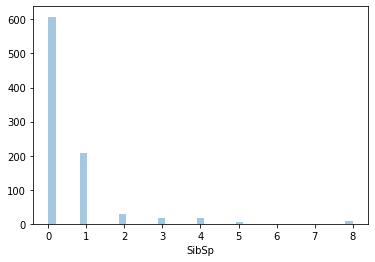

In [14]:
#Analysis : Most people were singles onboarded 😌 and next top is 1 which might be spouse.
sns.distplot(train['SibSp'],kde=False)

In [15]:
#Either ila anna geeyachchu histogram or countPlot or distplot functions ni use chesi geeyachchu.
#ivi builtin Pandas functions.

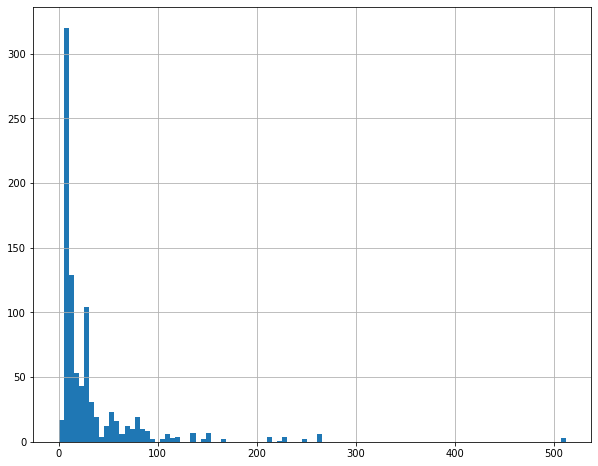

In [16]:
#Analysis : Shows more people paid amount in range of 0-50. Previously we have also seen most of them were in cheaper class
train["Fare"].hist(bins=100,figsize=(10,8))

In [17]:
# step 2 :Cleaning Data to remove Nan's.

In [18]:
# Aa null ages place lo vere values ni impute cheyali, impute ante just fill cheyali.
#So average age ni impute chesekante better 1st class lo travel chese vallaki first class lo unna average age, second class
#lo travel chese vallaki second class average age and third class vallaki third class average age fill cheste inkonchem 
#effective ga untundhi.

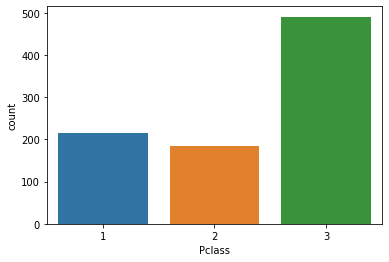

In [19]:
#Analysis : Yekkuva age undevallu, Pedhdha classes ni choose cheskuntunnaru, ante em anukovachchu, age yekkuva unte wealth
#yekkuva untadhi and thus more wealth luxurious class ni select cheskuntaru travelling ki.
sns.countplot(x='Pclass',data=train)#data argument important, lekunte yela telusthadhi cheppu yeh dataFrame column oh ani.
#Analysis : Chuudu mostly are from 3rd class.

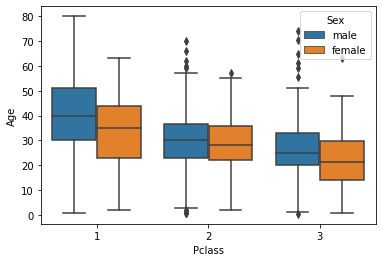

In [20]:
#X and Y rendu arguments adigindhi ante X vs Y ani, Okkate adigithe X vs count ani
# mostly annintlo ilane jarigindhi.
sns.boxplot(x="Pclass",y="Age",hue="Sex",data=train)

In [21]:
#plotly use chesi create chese plots ni zoom cheskoni customizations yekkuva cheyachchu.

In [22]:
#DataFrame lo yevanna columns or rows lo unna data ni change cheyali or oka function perform chesi aa function ichche 
#output ni dataFrame lo aa columns or rows lo fill cheyali, alanti case lo function raasi .apply() method ni call chesthe, 
#aa method return chese values tho aa cells fill avuthay. axis=1 isthe column wise axis=0 isthe rowwise.

In [23]:
#aa function using which we are filling data into cells after getting averages from above boxplots. ( Box plot plot
#plot chesindhe andhuku #Averages kanukkovataniki)
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else: 
        return Age

In [24]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)  # Aa function ki automatic ga pass avuthay
                                                                #aa column names as arguments.
    #Ikkada manam aa rendu columns ni full ga pamputhunnam, but remember okkosari aa rendu column lo unna one pair one pair
    #pass avuthay. So anduke aa function lo aa rendu values ne okkasari access chese laaga raasaru.

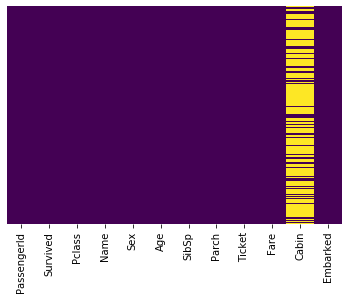

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [26]:
#Anni NULLs unna column ni edit cheyatam kante, better aa column ne remove cheyatam.

In [27]:
 train.drop(columns='Cabin',inplace=True)   

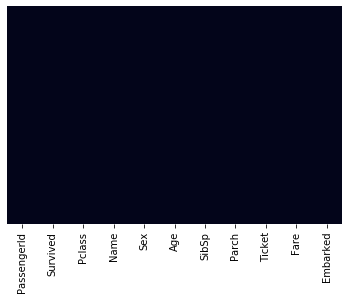

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [29]:
train.dropna(inplace=True)      #Axis by default 0 kabatii aa rows 1 or 2 untay So vaatini remove cheyatame uththamam.
#Just inka yedanna null value unte adhi remove chesthundi.

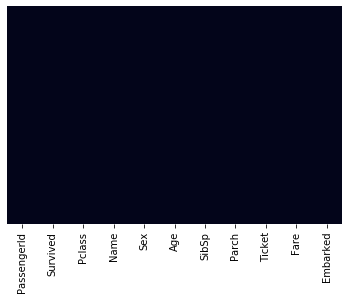

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [31]:
#Now we have successfully removed or modified Nan's.

In [32]:
#Ikkada kindha em chesam 
# 1.Classification algorithm ki classification labels undali.
# 2.Now classification labels tho train cheseki aa strings ni machine learning algorithm chadavaledhu.
# 3.So aa strings remove chesesi ante, Sex column example teesukunte, Male and Female teesesi, Male ante 1 Female ante zero
# ila number undela cheyali. Ante dummy column values kavali with real values.
# 4. So alaga Embarked column lo kooda 3 differenct unnay, C,Q,S. Ivi three kadha, Ante, 3 labels unnay. So 3 characters or 
# 3 strings avi C,Q,S. Model strings ni chadavaledhu. So vaatiki kooda manaki ,dummy values kavali.
# 5. Now next thing :
#     Suppose male and Female output vachhindhi anuko. Kindha command drop teesesi execute chey. Appudu male and female 
#     rendu columns extra vasthay. But inko logic yentante, Male kaakapothe gender Female eh kadha. So daaniki malli 2 column
# s enduku okkati chaalu kadha. So daani valla accuracy dhebba thine chance undhi. So remove those columns. 
# 6.Adhe Embarked column lo 3 diff values. So two enough. 3rd dhi aa 2 kaakunte adhe ga. So remove that. 
# 7. Anthe thats all antha numerical data vacchiindhi.

In [33]:
train=pd.get_dummies(data=train,columns=["Sex","Embarked"]).drop(['Sex_female','Embarked_C','Name','Ticket'],axis=1)

In [34]:
train.drop('PassengerId',inplace=True,axis=1)              # Endukante no use passengerid tho manaki.

In [35]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [36]:
#Step 3 Machine Learning :

In [37]:
#Actually inko csv file undhi test set dhi. But andulo malli cleaning chesi train data lo unna columns laaga 
#teyvali vaatini, Adhi malli pedhdha task ani, ikkada aa test data ni use cheyakunda, direct ga, "train" dataFrame lo unna
#data ne test and train data ga split chestunnam.

In [38]:
X=train.drop("Survived",axis=1)    # Except survived column migatha vi anni manam use chese features, Survived ah kaadha
#ane daanni predict cheseki.

In [39]:
y=train['Survived']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel=LogisticRegression()

In [45]:
logmodel.fit(X_train,y_train)

C:\Users\kprut\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predictions=logmodel.predict(X_test)

In [57]:
y_test                           #Expect chesinavi

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

In [58]:
predictions                        #Output vachchinavi train chesina tarvaatha.

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [64]:
from sklearn.metrics import classification_report   #Confusion matric use chesi maname accuracy, precision ivanni
#calculate chesekante, better classificationmatrix method ni call chesthe, Ahde output ichechesthundhi aa values ni.

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [65]:
# To print confusion matrix.

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [ ]:
#So yes paina chuudu Accuracy 81% vachhcindhi. Anthe.So mana model final accuracy 81% ani. Anthe antha correct ga predict
#cheyagaladhu ani.